This notebook is the code for the blog post "Computational View of Flattening the Curve in an SIR Model" by Lucas Bouck on his blog at https://lucasbouck.blogspot.com/

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [2]:
# right hand side of nondimensionalized differential equation
def rhs(t, y, R0):
    # y[0] = S_tilde, y[1] = I_tilde
    SI_tilde = np.prod(y)
    return np.array([-1,1])*R0*SI_tilde + np.array([0,-1])*y[1]

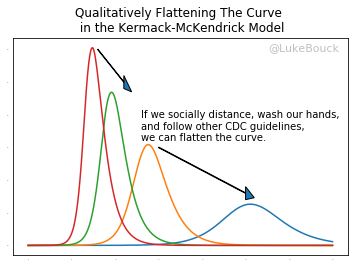

In [133]:
tspan = (0,35)
teval = np.linspace(0,35,1000)
I0 = 1e-6
S0 = 1-I0
S0_tilde = 1
I0_tilde = I0/S0
y0 = np.array([S0_tilde, I0_tilde])

fig = plt.figure()
for R0 in np.arange(1.5,3.5,.5):
    soln = solve_ivp(lambda t,y: rhs(t,y,R0), tspan, y0, t_eval = teval)
    plt.plot(soln.t, S0*soln.y[1])
    
plt.title("Qualitatively Flattening The Curve \n in the Kermack-McKendrick Model")
plt.tick_params(labelsize=0,length=0)
plt.annotate(s="If we socially distance, wash our hands,\
\nand follow other CDC guidelines,\
\nwe can flatten the curve.",xy=(1,.1), xytext=(13,.16))
plt.arrow(15,.15,10,-.07, head_width=-.02,head_length=1)
plt.arrow(8,.3,3,-.05, head_width=-.02,head_length=.9)
fig.text(0.88, 0.83, '@LukeBouck',
         fontsize=11, color='gray',
         ha='right', va='bottom', alpha=0.5)
plt.savefig("flatten_the_curve.png")